In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/e-commerce-product-and-customer-dataset/refined_ecommerce_product_data.csv


In [2]:
df = pd.read_csv("/kaggle/input/e-commerce-product-and-customer-dataset/refined_ecommerce_product_data.csv")

In [3]:
df. head()

,Product_ID,Product_Name,Category,Sub_Category,Price,Customer_Age,Customer_Gender,Purchase_History,Review_Rating,Review_Sentiment
0,P0001,Sweater,Clothing,Pants,38.44,58,Male,16,2,Negative
1,P0002,Dining Table,Furniture,Chair,408.46,53,Female,4,5,Very Positive
2,P0003,Skincare Cream,Beauty,Hair Care,22.04,54,Male,7,2,Negative
3,P0004,Skincare Cream,Beauty,Makeup,145.24,27,Female,21,4,Neutral
4,P0005,Bluetooth Speaker,Electronics,Headphones,862.61,44,Female,27,5,Very Positive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_ID        8000 non-null   object 
 1   Product_Name      8000 non-null   object 
 2   Category          8000 non-null   object 
 3   Sub_Category      8000 non-null   object 
 4   Price             8000 non-null   float64
 5   Customer_Age      8000 non-null   int64  
 6   Customer_Gender   8000 non-null   object 
 7   Purchase_History  8000 non-null   int64  
 8   Review_Rating     8000 non-null   int64  
 9   Review_Sentiment  8000 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 625.1+ KB


In [5]:
print("\nEstatísticas:")
print(df.describe())

print("\nValores nulos por coluna:")
print(df.isnull().sum())


Estatísticas:
             Price  Customer_Age  Purchase_History  Review_Rating
count  8000.000000   8000.000000        8000.00000    8000.000000
mean    456.826230     41.614125          18.47525       4.139875
std     398.171055     13.958853          10.86197       0.936306
min       5.120000     18.000000           0.00000       1.000000
25%     126.877500     29.000000          11.00000       4.000000
50%     325.460000     42.000000          17.00000       4.000000
75%     721.077500     54.000000          25.00000       5.000000
max    1499.720000     65.000000          50.00000       5.000000

Valores nulos por coluna:
Product_ID          0
Product_Name        0
Category            0
Sub_Category        0
Price               0
Customer_Age        0
Customer_Gender     0
Purchase_History    0
Review_Rating       0
Review_Sentiment    0
dtype: int64


In [6]:
sns.set_style("whitegrid")

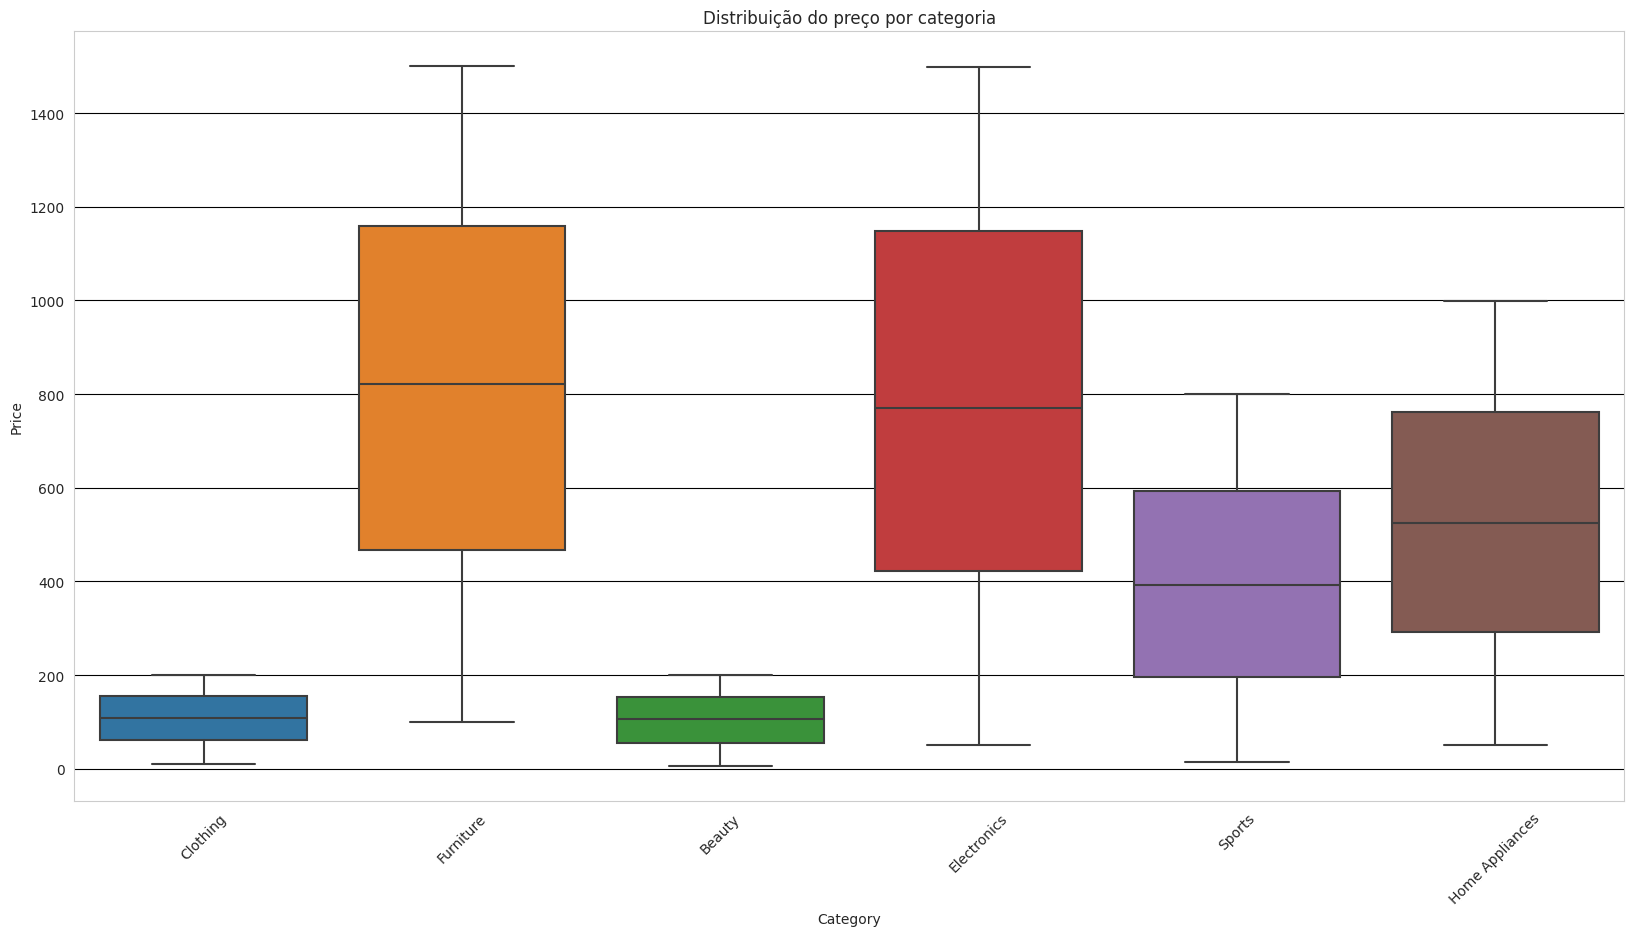

In [7]:
plt.figure(figsize=(20,10))
sns.boxplot(x=df['Category'], y=df['Price'])
plt.xticks(rotation=45)
plt.title('Distribuição do preço por categoria')
plt.grid(axis='y', color='black')
plt.show()

In [8]:
qtd = df['Category'].value_counts().reset_index(name='Frequencia')
qtd.columns = ['Category', 'Frequencia']
qtd

,Category,Frequencia
0,Home Appliances,1362
1,Electronics,1357
2,Sports,1356
3,Clothing,1354
4,Furniture,1310
5,Beauty,1261


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


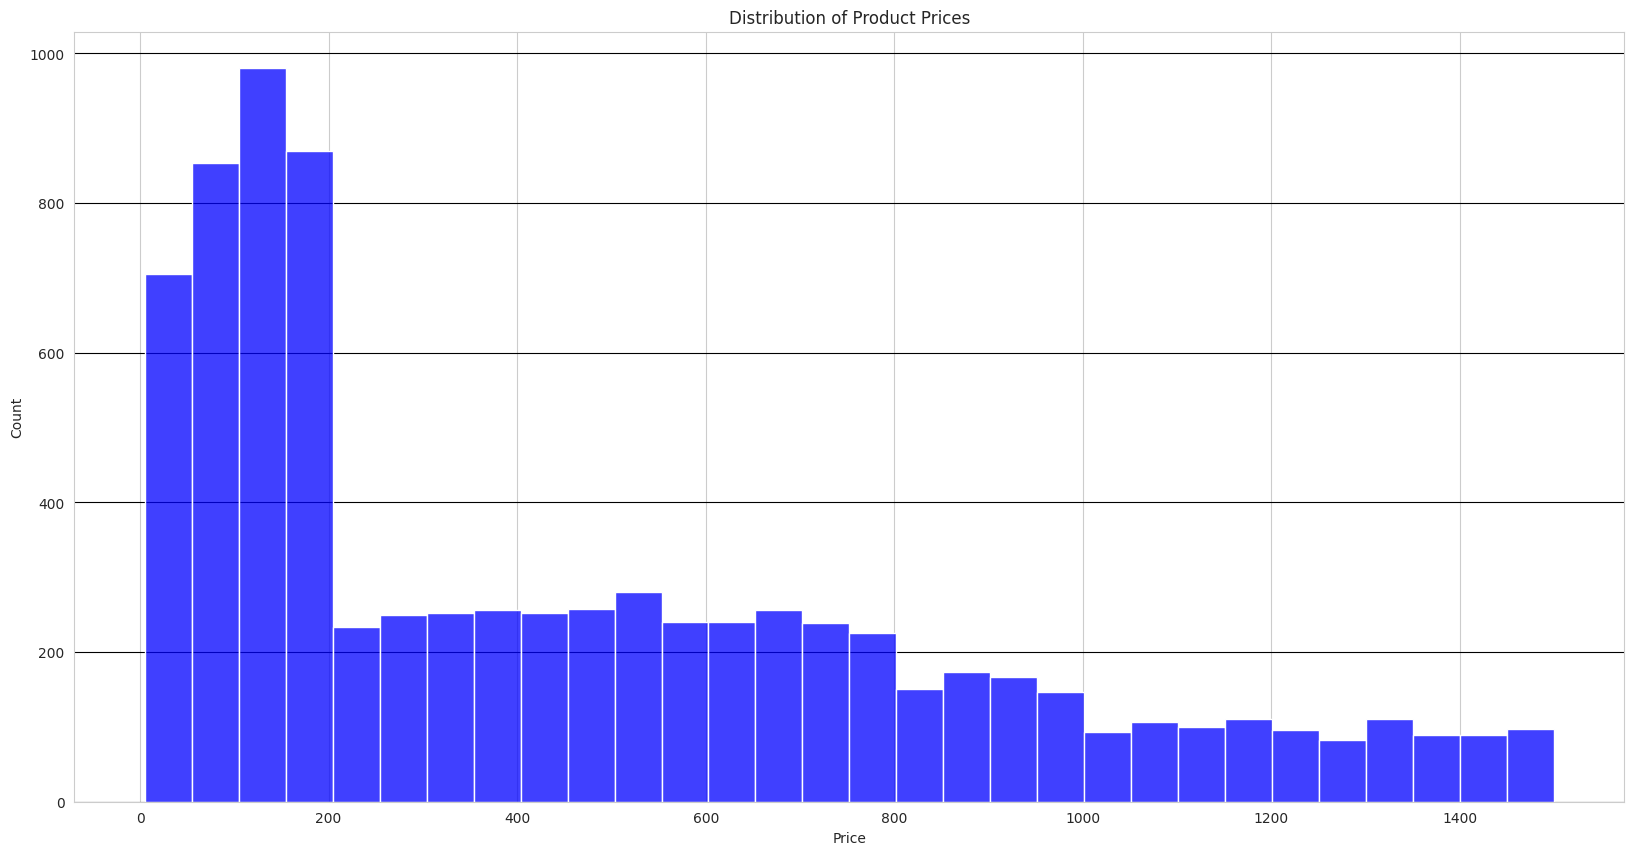

In [9]:
plt.figure(figsize=(20, 10))
sns.histplot(df['Price'], bins=30, kde=False, color='blue')
plt.title('Distribution of Product Prices')
plt.grid(axis='y', color='black')
plt.show()

In [10]:
qtd = df['Price'].value_counts().reset_index(name='Frequencia')
qtd.columns = ['Price', 'Frequencia']
qtd

,Price,Frequencia
0,47.67,4
1,123.28,4
2,125.67,4
3,136.07,3
4,153.30,3
...,...,...
7614,231.62,1
7615,33.23,1
7616,30.10,1
7617,1435.58,1


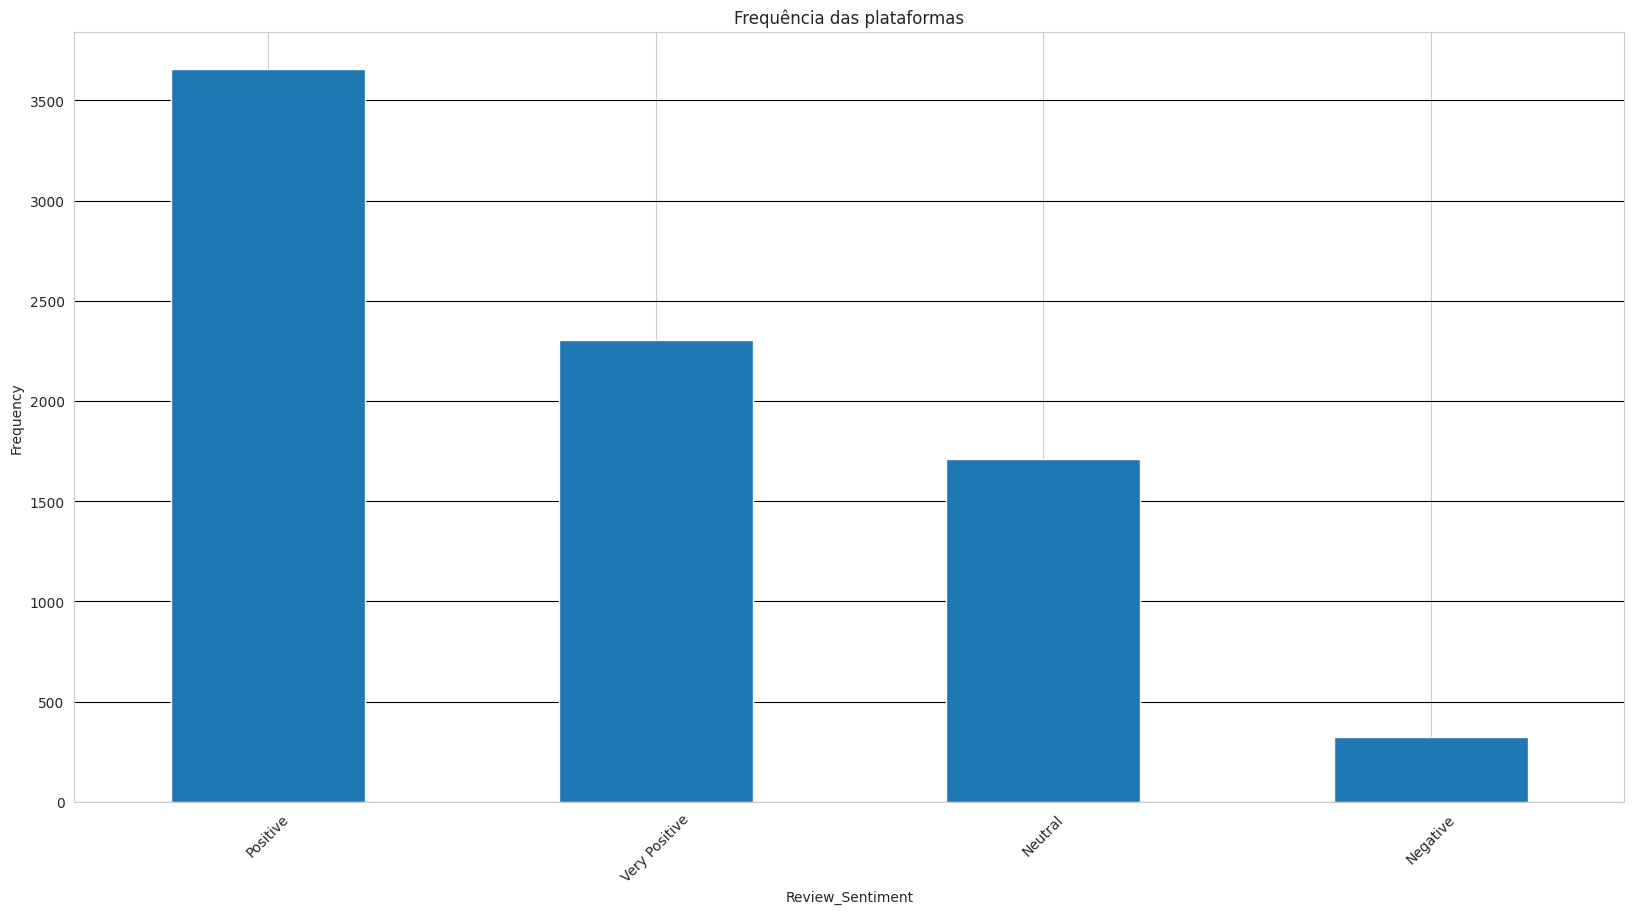

In [11]:
plt.figure(figsize=(20, 10))
plt.title("Frequência das plataformas")
plt.xlabel("Review_Sentiment")
plt.ylabel("Frequency")
df['Review_Sentiment'].value_counts().plot(kind='bar')
plt.grid(axis='y', color='black')
plt.xticks(rotation=45)
plt.show()

In [12]:
qtd = df['Review_Sentiment'].value_counts().reset_index(name='Frequencia')
qtd.columns = ['Review_Sentiment', 'Frequencia']
qtd

,Review_Sentiment,Frequencia
0,Positive,3658
1,Very Positive,2306
2,Neutral,1712
3,Negative,324


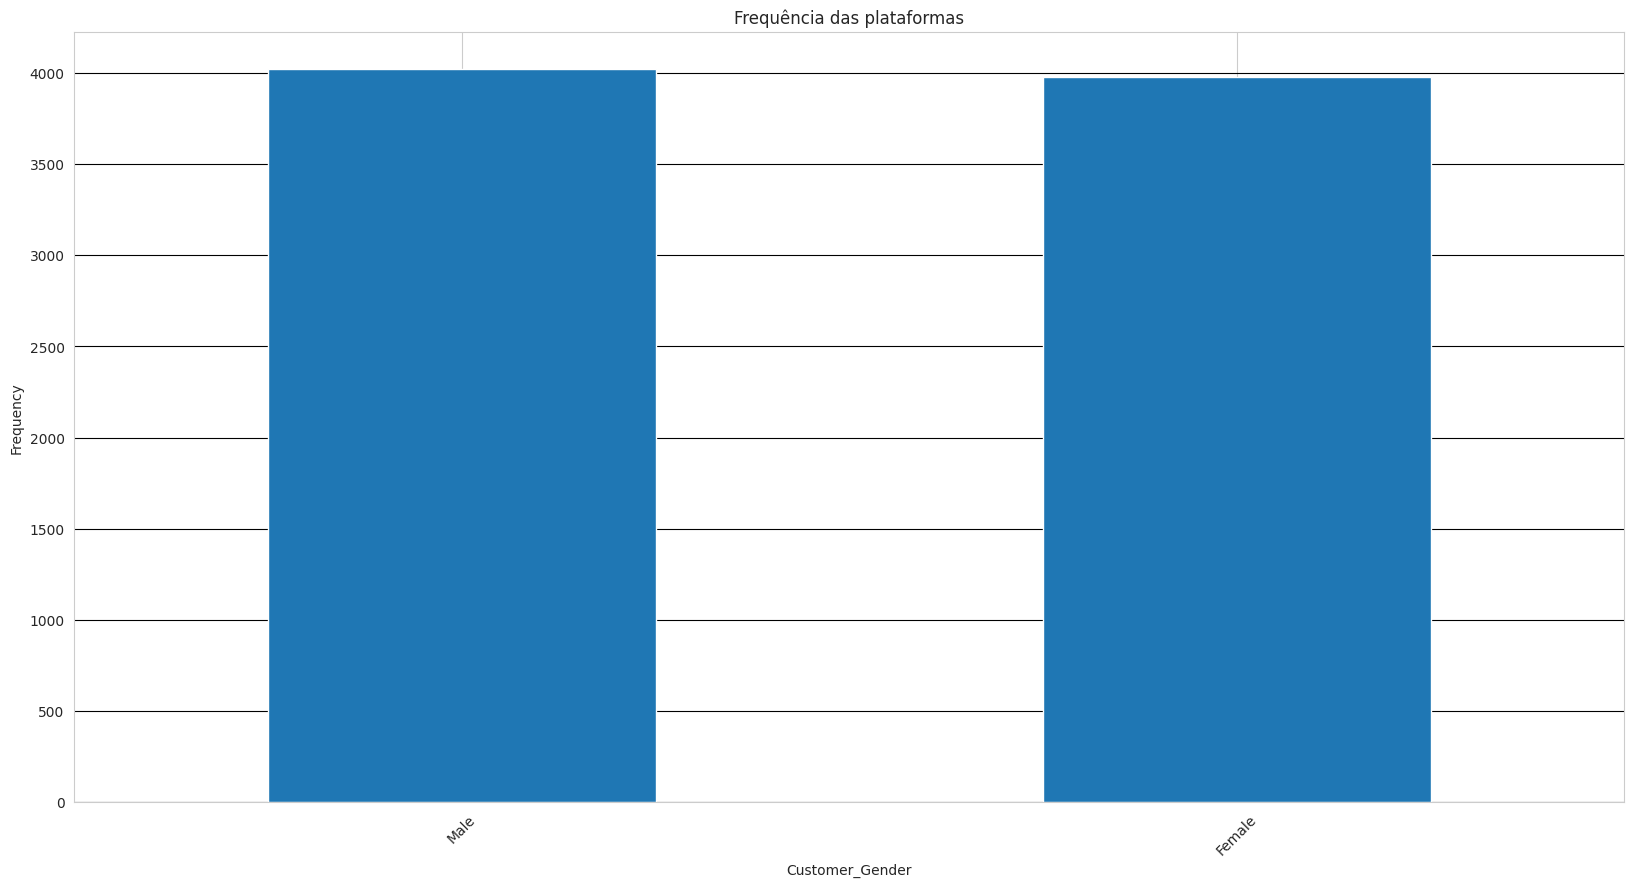

In [13]:
plt.figure(figsize=(20, 10))
plt.title("Frequência das plataformas")
plt.xlabel("Customer_Gender")
plt.ylabel("Frequency")
df['Customer_Gender'].value_counts().plot(kind='bar')
plt.grid(axis='y', color='black')
plt.xticks(rotation=45)
plt.show()

In [14]:
qtd = df['Customer_Gender'].value_counts().reset_index(name='Frequencia')
qtd.columns = ['Customer_Gender', 'Frequencia']
qtd

,Customer_Gender,Frequencia
0,Male,4023
1,Female,3977


# ML

In [15]:
# Importando bibliotecas necessárias
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import cross_val_score

In [16]:
# 1. Pré-processamento de Dados

# Convertendo variáveis categóricas em numéricas
label_encoder = LabelEncoder()
df['Customer_Gender'] = label_encoder.fit_transform(df['Customer_Gender'])
df['Review_Sentiment'] = label_encoder.fit_transform(df['Review_Sentiment'])
df['Category'] = label_encoder.fit_transform(df['Category'])
df['Sub_Category'] = label_encoder.fit_transform(df['Sub_Category'])

# Separando variáveis independentes (X) e dependentes (y)
X = df.drop(columns=['Price', 'Review_Rating', 'Product_ID', 'Product_Name'])  # Remover 'Product_ID' e 'Product_Name' (não numéricas)
y_regression = df['Price']  # Para regressão: previsão de preço
y_classification = df['Review_Sentiment']  # Para classificação: previsão de sentimento da revisão

# Dividindo os dados em treino e teste
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_classification, test_size=0.2, random_state=42)

# Normalização dos dados (para modelos sensíveis à escala como SVM e Regressão Linear)
scaler = StandardScaler()

# Ajustando o escalonador apenas nas variáveis numéricas
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# 2. Modelos de Regressão

# Regressão Linear
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train_reg)
y_pred_reg = linear_reg.predict(X_test_scaled)

# Avaliando o desempenho do modelo de regressão
mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f'Mean Squared Error (Regressão Linear): {mse}')

Mean Squared Error (Regressão Linear): 114434.76107586994


In [18]:
# Árvore de Decisão para Regressão
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train_reg)
y_pred_tree_reg = tree_reg.predict(X_test)

# Avaliando o desempenho da Árvore de Decisão
mse_tree = mean_squared_error(y_test_reg, y_pred_tree_reg)
print(f'Mean Squared Error (Árvore de Decisão): {mse_tree}')

Mean Squared Error (Árvore de Decisão): 133035.9275971875


In [19]:
# Definindo os parâmetros para o RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Randomized Search
rf = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train_scaled, y_train_reg)

# Melhor combinação de parâmetros
print(f'Best parameters: {random_search.best_params_}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10}


In [20]:
# Inicializando o Random Forest com os melhores parâmetros encontrados
rf_reg_optimized = RandomForestRegressor(
    n_estimators=300,
    min_samples_split=10,
    min_samples_leaf=1,
    max_features='sqrt',
    max_depth=10,
    random_state=42
)

# Treinando o modelo
rf_reg_optimized.fit(X_train_scaled, y_train_reg)

# Fazendo previsões
y_pred_rf_reg = rf_reg_optimized.predict(X_test_scaled)

# Avaliando o desempenho com Mean Squared Error (MSE) no conjunto de teste
mse_rf = mean_squared_error(y_test_reg, y_pred_rf_reg)
print(f'Mean Squared Error (Random Forest - Test Set): {mse_rf}')

# Avaliação do modelo com validação cruzada (5 folds)
cv_scores_rf = cross_val_score(rf_reg_optimized, X, y_regression, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-validated MSE (Random Forest): {-cv_scores_rf.mean()}')


Mean Squared Error (Random Forest - Test Set): 71014.57378650215
Cross-validated MSE (Random Forest): 67423.02706535152
